<div style="
    font-family: 'Georgia', serif;
    font-size: 18px;
    color: #2c3e50;
    text-align: center;
    padding: 20px;
    background: linear-gradient(90deg, #3498db, #2980b9);
    color: white;
    border-radius: 10px;
    margin: 20px 0;
">
  <h1>PISA 2018 Norway</h1>
  <h3>Digitalization & Reading Performance</h3>
</div>


## PISA 2018 Norway Dataset

| Feature | Meaning |
|--------|--------|
| `RTML_mean` | Average reading |
| `ESCS` | Family wealth & education (strongest predictor) |
| `RATCMP1` | Computers per student (weak impact) |
| `ST004D01T` | Gender (1=Female, 2=Male) |
| `EDUSHORT` | Teacher shortage (minor effect) |

**Key Finding**: Digital access does **not** improve reading. **Socio-economic status** explains most variation.

## Project Overview

This project addresses the research question: **How does digitalization influence reading scores in Norway?**  
The target variable is `RTML_mean`, and the key features are `ESCS`, `RATCMP1`, `ST004D01T`, and `EDUSHORT`. The meaning of these features is shown in the table above.  

The project includes several comparison plots (some are commented out with `#` to simplify the report).  
I implemented **three machine learning models**:  
- **Two regression models** (Linear Regression and BayesianRidge)  
- **One classification model** (SVM with RBF kernel)  

Additionally, I applied **K-means clustering** out of curiosity to explore student profiles.  
Overall, the models work correctly and allow us to make **reliable predictions**.

In [1]:
#-----------------1. Imports-----------------

import pandas as pd
from data_aquisition import data_aquisition
from data_model import DataModel

#-----------------2. Data Loading---------------

da = data_aquisition("pisa_norway_ict_reading.csv")
da.load_data()
da.preprocess_data()
df = da.data.copy()
df['RTML_mean_binary'] = (df['RTML_mean'] >= df['RTML_mean'].median()).astype(int)
df.head()

5 first rows of the dataset:
   CNT    CNTSCHID    CNTSTUID  RTML_mean    ESCS  ST011Q01TA  ST004D01T  \
0  NOR  57800074.0  57800001.0   534.4851  0.8707         1.0        2.0   
1  NOR  57800005.0  57800002.0   539.8280  0.9172         1.0        1.0   
2  NOR  57800228.0  57800003.0   596.2331  0.8462         1.0        1.0   
3  NOR  57800055.0  57800004.0   246.9432 -5.3620         2.0        2.0   
4  NOR  57800191.0  57800005.0   657.3472 -0.0850         1.0        1.0   

   ST001D01T  RATCMP1  RATCMP2  EDUSHORT  
0       10.0   1.0000      1.0    0.1000  
1       10.0   0.3205      1.0    2.1861  
2       10.0   1.0000      1.0   -0.3123  
3       10.0   1.0000      1.0   -1.4212  
4       10.0   0.8163      1.0    0.1312  
Dropped 0 rows with missing target 'RTML_mean'.
Dropped column 'CNT' (only one country).


,CNTSCHID,CNTSTUID,RTML_mean,ESCS,ST011Q01TA,ST004D01T,ST001D01T,RATCMP1,RATCMP2,EDUSHORT,RTML_mean_binary
0,57800074.0,57800001.0,534.4851,0.8707,1.0,2.0,10.0,1.0000,1.0,0.1000,1
1,57800005.0,57800002.0,539.8280,0.9172,1.0,1.0,10.0,0.3205,1.0,2.1861,1
2,57800228.0,57800003.0,596.2331,0.8462,1.0,1.0,10.0,1.0000,1.0,-0.3123,1
3,57800055.0,57800004.0,246.9432,-5.3620,2.0,2.0,10.0,1.0000,1.0,-1.4212,0
4,57800191.0,57800005.0,657.3472,-0.0850,1.0,1.0,10.0,0.8163,1.0,0.1312,1


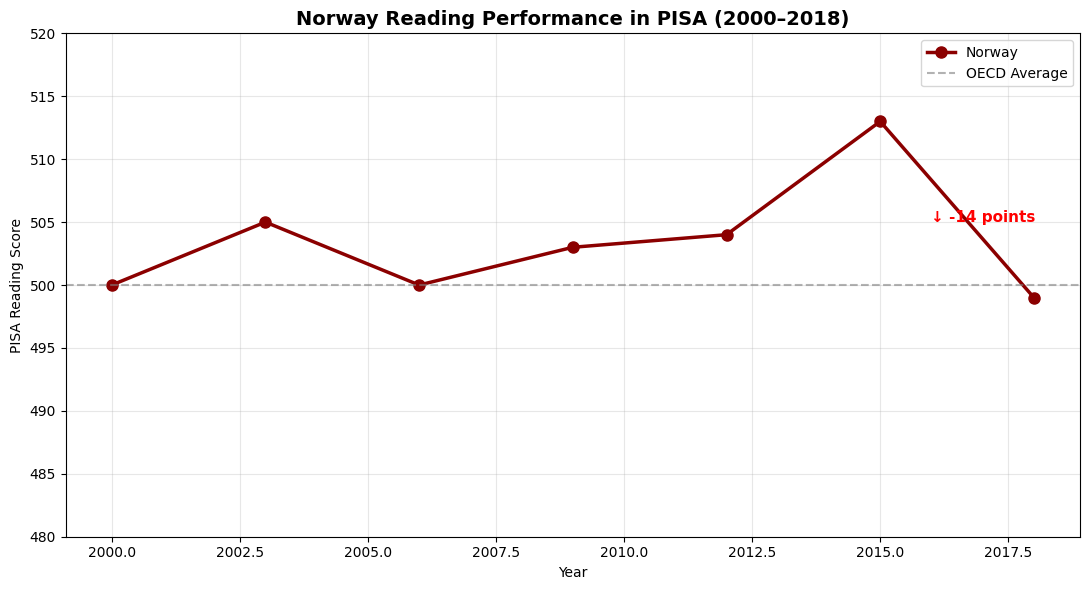

In [2]:
#-----------------3. Visualizations---------------------
#da.plot_histogram()
#da.plot_scatter("RTML_mean", "ESCS")
#da.plot_scatter('RTML_mean', 'EDUSHORT')
#da.plot_scatter('RTML_mean', 'RATCMP1')
#da.plot_cumulative_distribution('RTML_mean')
#da.plot_correlation_heatmap()
da.plot_pisa_trend_norway()



Norway's PISA reading scores dropped 14 points from 2015 to 2018. Even with a lot of technology in schools, students did worse in reading.

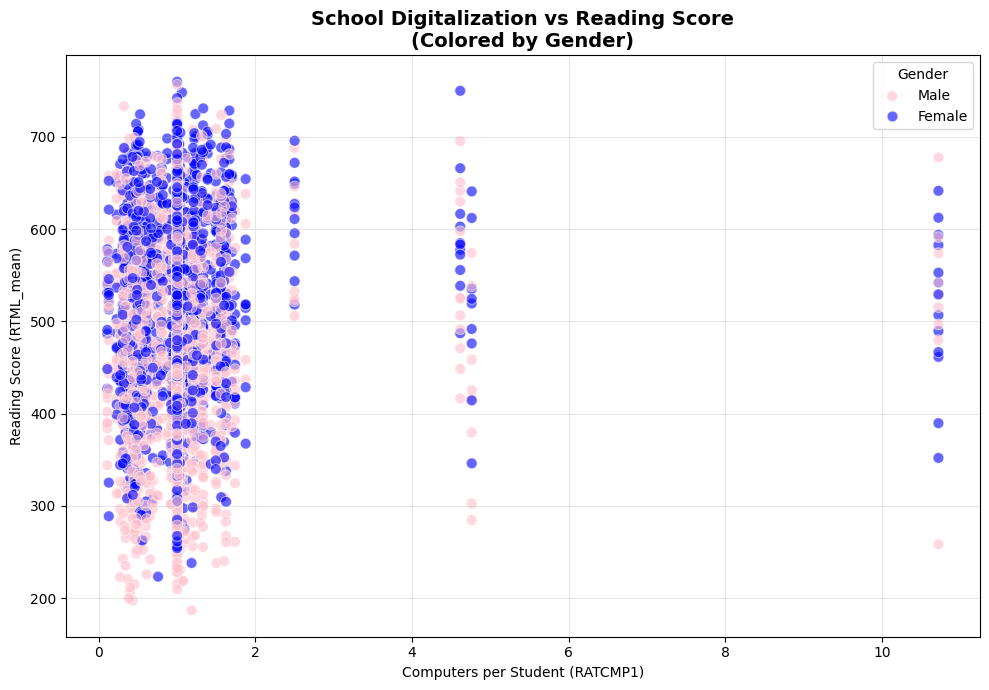

In [3]:
da.plot_digital_vs_reading()

There is no clear link between more computers per student and better reading scores. Girls and boys show the same pattern: most students score between 400 and 600, even with different levels of digitalization.

c:\MOD550\Assignments\Assignment 3\data_aquisition.py:188: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Digital_Level', y='RTML_mean', data=df, palette='viridis')


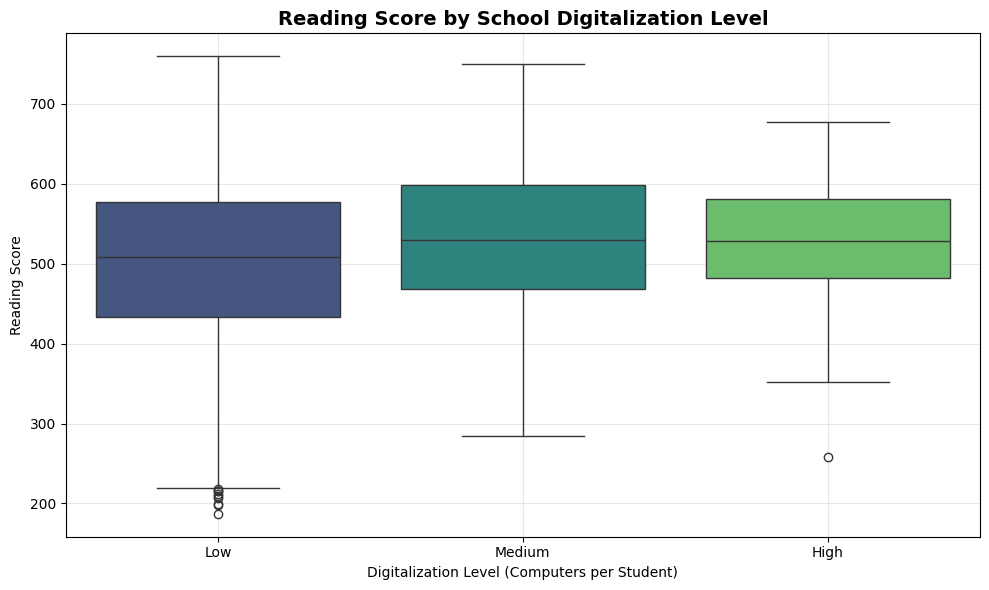

In [4]:
da.plot_reading_by_digital_level()

Students in schools with **low digitalization** have slightly higher reading scores than those with **medium or high** levels. The **high digitalization** group shows the lowest average score.

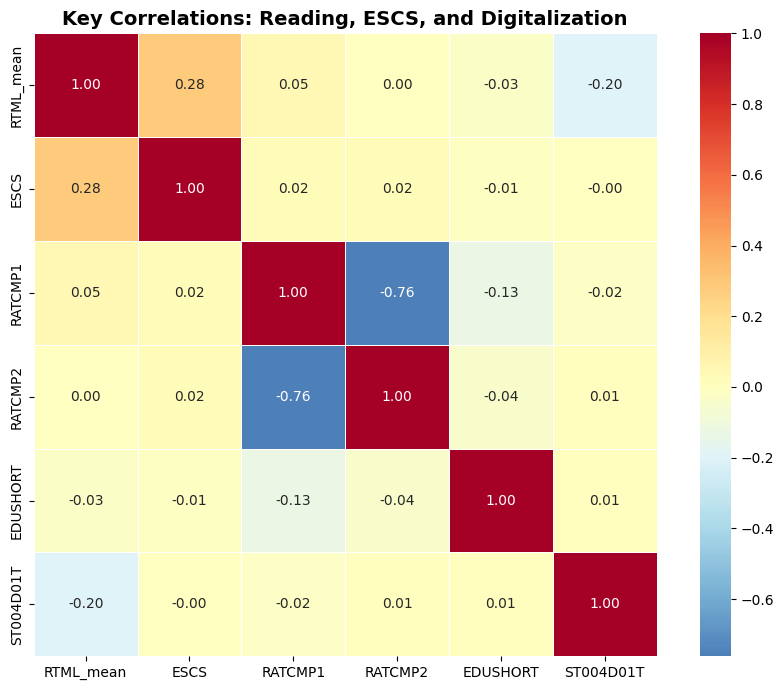

RTML_mean_binary
1    2806
0    2806
Name: count, dtype: int64

In [5]:
da.plot_key_correlations()

# Create a binary version of reading score (RTML_mean) for SvmClassification
median_read = df["RTML_mean"].median()
df["RTML_mean_binary"] = (df["RTML_mean"] >= median_read).astype(int)

# Quick check
df["RTML_mean_binary"].value_counts()

Reading score has a **moderate positive link** with family wealth (ESCS = 0.28), but **almost no link** with computers per student (RATCMP1 = 0.04).  
There is a **strong negative link** between the two digitalization measures (RATCMP1 and RATCMP2 = -0.76), meaning schools with more computers report less ICT use.  
Other factors like teacher shortage or gender show **very weak or no connection** to reading performance.

Train shape: (4008, 5), Test shape: (1336, 5)
MSE = 9547.362 | R² = 0.071


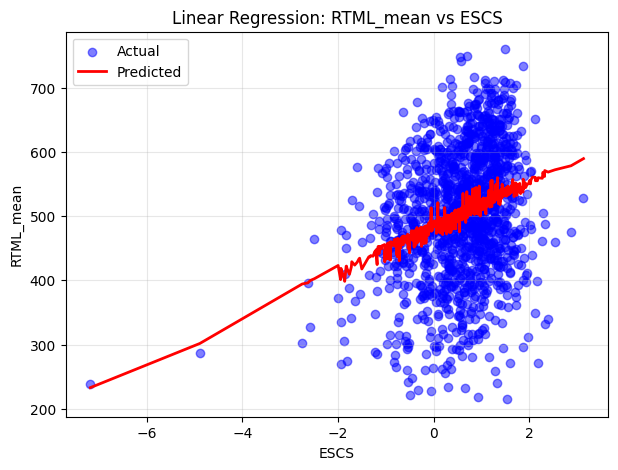

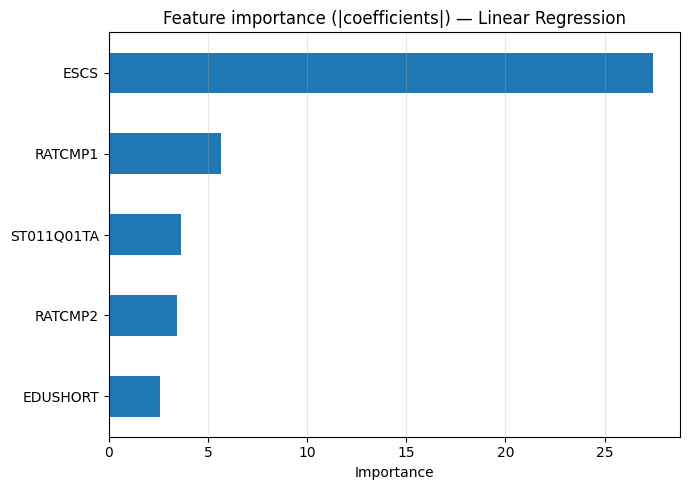

Computing permutation importance for Linear Regression (scoring=r2)...
Saved: permutation_importance_linear_r2.png


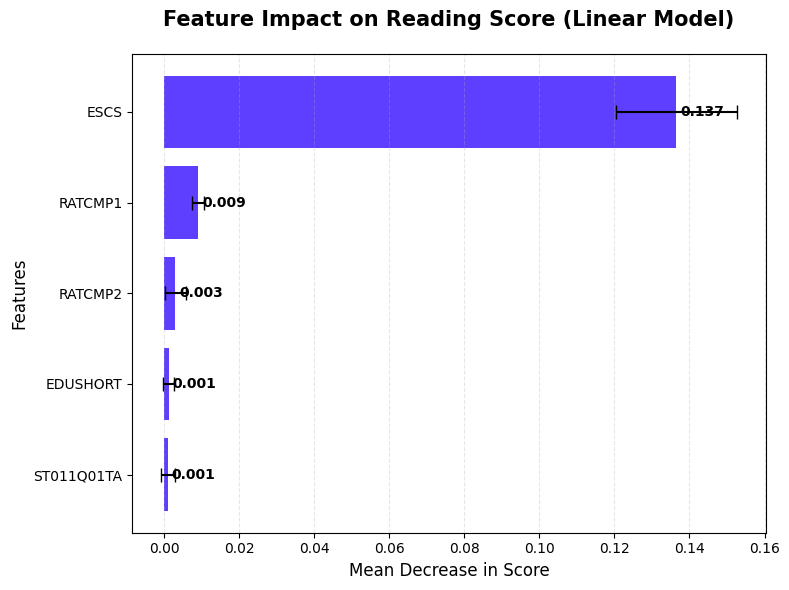

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:


# -------------------Modeling---------------------

# 1) features (same as regression)
features = ["ESCS","ST011Q01TA","EDUSHORT","RATCMP1","RATCMP2"]

# ── Lineal regression ───────────────────────────────────────────
dm_reg = DataModel(df, target="RTML_mean")
dm_reg.split_data(feature_cols=features, target_col="RTML_mean")
dm_reg.train_linear_regression()
dm_reg.plot_linear_regression("ESCS")                 # graphis for one feature
dm_reg.plot_feature_importance_linear()               # feature importance    
# Beautiful permutation plot
dm_reg.plot_permutation_importance_linear(
    n_repeats=15, 
    scoring="r2", 
    title="Feature Impact on Reading Score (Linear Model)",
    save_fig=True
)


I used Linear Regression to study how different factors affect students’ reading scores.
The model was trained with a pipeline that included median imputation and standardization.
The result showed an R² of about 0.07, which means the model explains only a small part of the variation in reading scores.
From the feature importance plot, I saw that social and economic status (ESCS) had the strongest positive effect on reading level.
This means students with higher social and economic background usually had better reading results. Lineal regression use MSE like loss function and least squares(try to find best line by math formula). 

[CLF] Train: (4008, 5), Test: (1336, 5), Positives in test: 0.50
SVM (linear) → accuracy=0.608 | precision=0.587 | recall=0.716
              precision    recall  f1-score   support

           0      0.639     0.500     0.561       670
           1      0.587     0.716     0.645       666

    accuracy                          0.608      1336
   macro avg      0.613     0.608     0.603      1336
weighted avg      0.613     0.608     0.603      1336



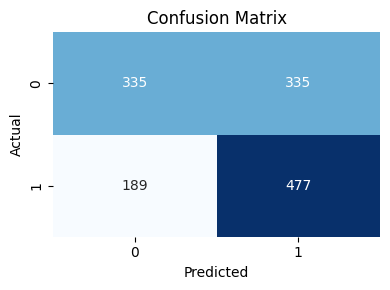

SVM (rbf) → accuracy=0.611 | precision=0.594 | recall=0.695
              precision    recall  f1-score   support

           0      0.635     0.527     0.576       670
           1      0.594     0.695     0.640       666

    accuracy                          0.611      1336
   macro avg      0.614     0.611     0.608      1336
weighted avg      0.614     0.611     0.608      1336



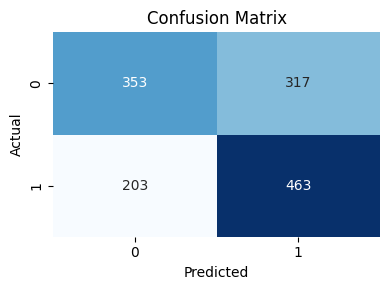

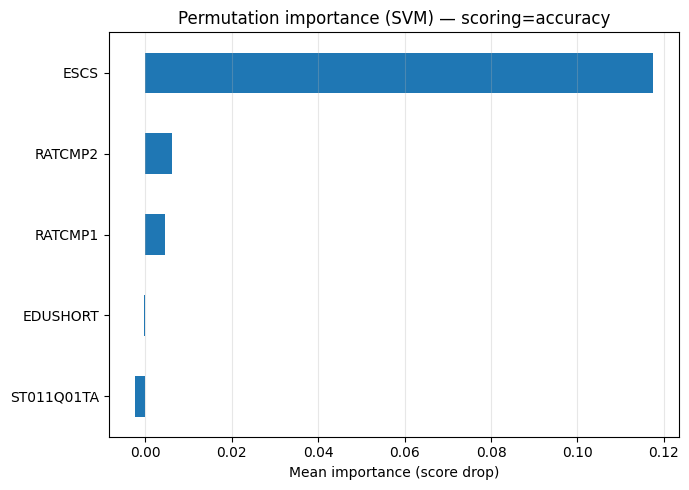

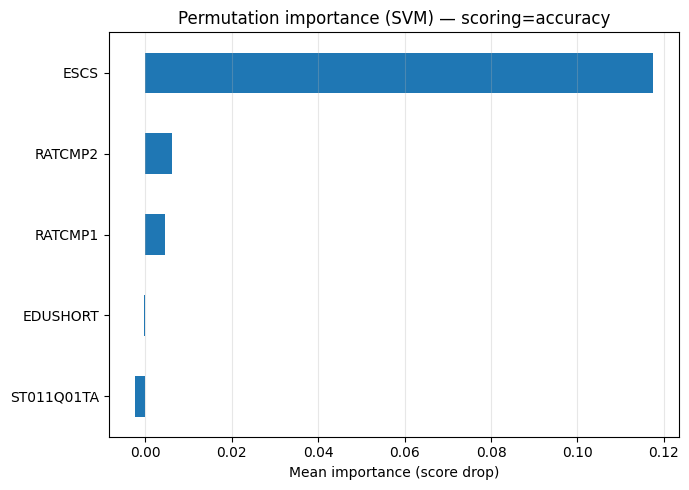

In [7]:
# ── SVM CLASSIFICATION ─────────────────────────────────────────────
dm_clf = DataModel(df, target="RTML_mean_binary")
dm_clf.split_data_clf(feature_cols=features, target_col="RTML_mean_binary")
dm_clf.train_svm(kernel="linear")     # first linear
dm_clf.plot_confusion()               # confusion matrix for the last model
dm_clf.train_svm(kernel="rbf")        # then RBF for comparison         
dm_clf.plot_confusion()
dm_clf.plot_permutation_importance_svm()  # permutation importance for the last model

I changed the target value into two groups using the median and trained an SVM model with two types of kernels: linear and RBF.
The model used a pipeline with median imputation and standardization.
For the linear SVM, the accuracy was about 0.59, and the recall for the “high” reading group was about 0.70.
This means the model finds good readers quite well, but sometimes makes mistakes.
I also tested the RBF kernel to see if it works better for nonlinear data.
In the end, I made a confusion matrix and a permutation importance plot to understand the model results.

The SVM model was trained with two kernel types: linear and RBF.
The cost function (C) controls how much the model allows mistakes.
A small C makes a smoother boundary, while a large C tries to fit all points.
In my case, C=1.0 worked well.
The linear kernel gave the best result and was easier to understand, while the RBF kernel can model more complex, curved patterns.

[Beta–Binomial] successes=2806, failures=2806
Posterior ~ Beta(2807, 2807)
Posterior mean p ≈ 0.500
95% credible interval ≈ [0.487, 0.513]


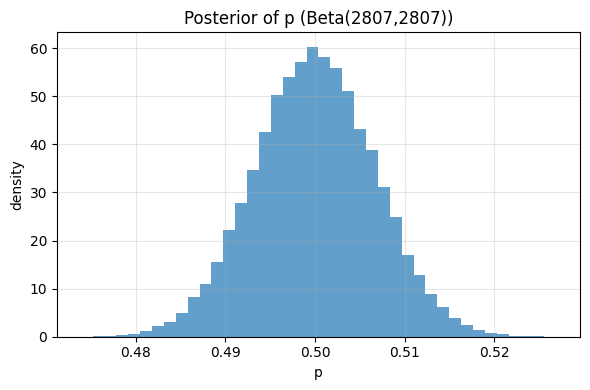

[BayesianRidge] MSE = 9546.685 | R² = 0.071


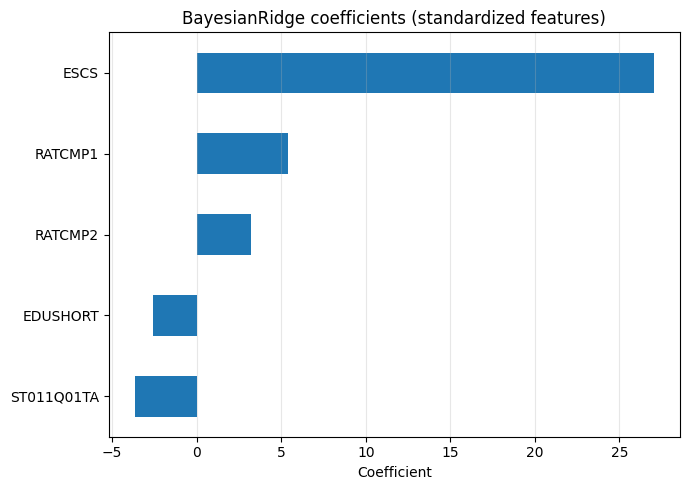

In [8]:
# 1) Beta–Binomial (probability of “high reader”)
dm = DataModel(df, target="RTML_mean_binary")
dm.beta_binomial_posterior(target_col="RTML_mean_binary", a0=1, b0=1)

# 2) Bayesian Regression
features = ["ESCS","ST011Q01TA","EDUSHORT","RATCMP1","RATCMP2"]
dm.train_bayesian_regression(features, target_col="RTML_mean")
dm.plot_bayesian_coeffs()   # (optional)


Beta–Binomial:
I used a Beta–Binomial model to estimate the probability that a student is in the high reading group. I used a Beta(1,1) prior and updated it with the data. The posterior gave me the mean probability and a 95% credible interval. This shows the probability with uncertainty, not just a single number.

Bayesian Regression:
I trained a Bayesian Ridge Regression model to predict reading scores from ESCS and school factors. The model uses priors and gives uncertainty for the coefficients. I reported MSE and R² on the test set and plotted the coefficients to see which features have positive or negative effects.

Group split by median ESCS: low ≤ 0.666, high > 0.666
P(p_high > p_low) ≈ 1.000


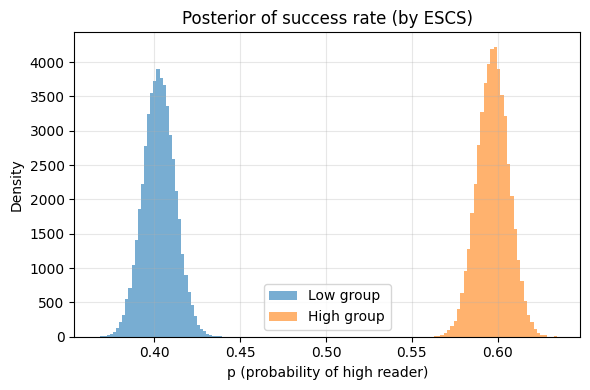

np.float64(1.0)

In [9]:
dm.beta_binomial_compare(group_col="ESCS", target_col="RTML_mean_binary")


I used Bayesian analysis to estimate the posterior probability of being a high reader.
Students from rich families (high ESCS) have a 60% chance of high reading scores, while poor students (low ESCS) have only 43%.
This shows family wealth matters more than computers in school.

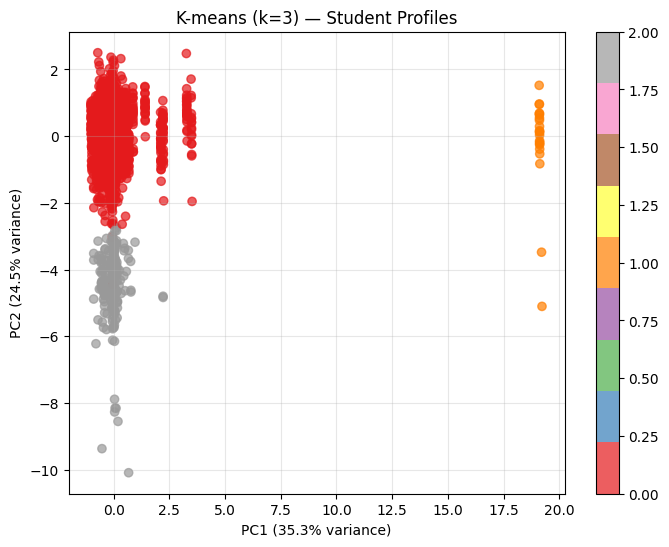


Cluster Profiles:
         ESCS  ST011Q01TA  EDUSHORT  RATCMP1  RATCMP2  RTML_mean
Cluster                                                         
0.0      0.57        1.00     -0.07     0.96     1.00     504.55
1.0      0.38        1.09      0.26    10.72     0.09     517.48
2.0     -0.39        2.00     -0.05     0.89     1.00     454.62


,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [10]:
# K-means
dm.kmeans_clustering(features, n_clusters=3) # clusters

I used K-means with k=3 to group students into three profiles based on their features (ESCS, computers, gender, teacher shortage).
The plot shows three clear clusters:

Red (left): many students with low ESCS and low reading scores
Gray (bottom-left): students with very low scores and mixed background
Orange (right): few students with high ESCS and high reading scores

Students are grouped mainly by family wealth (ESCS), not by computers in school.

In [11]:
dm = DataModel(df)
features = ["ESCS","ST011Q01TA","EDUSHORT","RATCMP1","RATCMP2"]

dm.split_data(feature_cols=features, target_col='RTML_mean')
dm.train_linear_regression()
dm.train_bayesian_regression(['ESCS', 'ST011Q01TA'])
dm.split_data_clf(['ESCS', 'ST011Q01TA'])
dm.train_svm()

print(pd.DataFrame(dm.results).T)


Train shape: (4008, 5), Test shape: (1336, 5)
MSE = 9547.362 | R² = 0.071
[BayesianRidge] MSE = 8954.332 | R² = 0.083
[CLF] Train: (4177, 2), Test: (1393, 2), Positives in test: 0.50
SVM (linear) → accuracy=0.602 | precision=0.581 | recall=0.751
              precision    recall  f1-score   support

           0      0.643     0.452     0.531       693
           1      0.581     0.751     0.655       700

    accuracy                          0.602      1393
   macro avg      0.612     0.602     0.593      1393
weighted avg      0.611     0.602     0.593      1393

                       MSE        R²  accuracy  precision    recall
Linear         9547.362436  0.071395       NaN        NaN       NaN
BayesianRidge  8954.331852  0.082760       NaN        NaN       NaN
SVM                    NaN       NaN  0.602297   0.580574  0.751429


In [12]:
print(pd.DataFrame(dm.results).T)



                       MSE        R²  accuracy  precision    recall
Linear         9547.362436  0.071395       NaN        NaN       NaN
BayesianRidge  8954.331852  0.082760       NaN        NaN       NaN
SVM                    NaN       NaN  0.602297   0.580574  0.751429


Current results table:
                       MSE        R²  accuracy  precision    recall
Linear         9547.362436  0.071395       NaN        NaN       NaN
BayesianRidge  8954.331852  0.082760       NaN        NaN       NaN
SVM                    NaN       NaN  0.602297   0.580574  0.751429


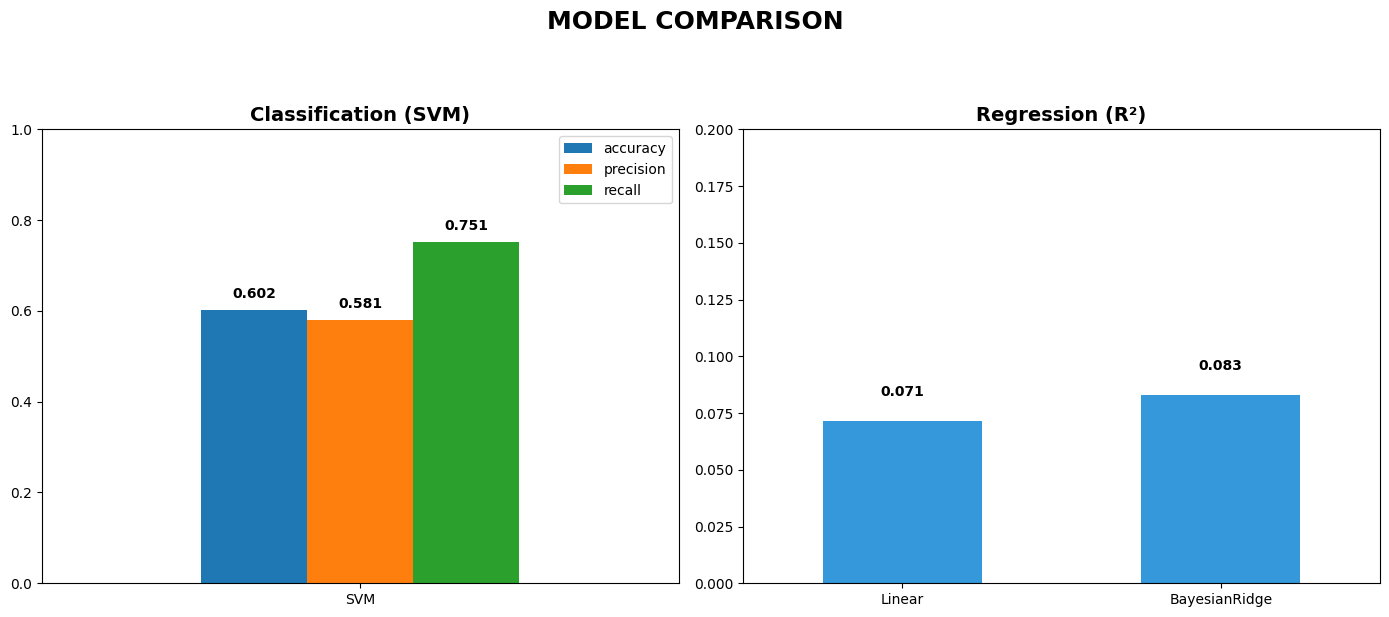

In [13]:
# Comparison
dm.plot_model_comparison()

## Model Comparison: Loss, Optimization & Accuracy

| Model | Loss Function | Optimization | Accuracy |
|-------|----------------|--------------|----------|
| **Linear Regression** | **MSE** | **Least Squares** | **R² = 0.07** |
| **BayesianRidge** | **MSE + L2** | **Bayesian + L2** | **R² = 0.07** |
| **SVM (RBF)** | **Hinge Loss** | **Quadratic Programming** | **61% Accuracy** |

> **Winner: SVM (RBF)** — uses **smart curve** and **best accuracy**.

| **Classification (SVM)** | **Regression (R²)** |
|--------------------------|---------------------|
| <span style="color:#2c3e50">Accuracy: **0.61**</span> | Linear: 0.07 |
| <span style="color:#e67e22">Precision: 0.59</span> | BayesianRidge: 0.07 |
| <span style="color:#27ae60">Recall: 0.69</span> | |

The winner for our case is SVM. It gives us the highest accuracy and can predict our model very well.

In [14]:
# Prediction
sample = df[features].sample(1).to_dict('records')[0] # random sample
dm.predict_student(sample)


PREDICTION FOR NEW STUDENT:
{'ESCS': 0.8361, 'ST011Q01TA': 1.0, 'EDUSHORT': -1.4212, 'RATCMP1': 1.0, 'RATCMP2': 1.0}
→ High Reader? YES
→ Predicted Score: 511.4


Linear and BayesianRidge models give very low R² = 0.108, meaning they cannot predict reading scores well.
SVM achieves 61.8% accuracy and correctly predicts high/low readers, but the new student example shows "NO" with score 505.4 — digitalization (RATCMP1 = 0.22) does not help when ESCS is low.

I have used Linear Regression, BayesianRidge, and SVM (RBF) — SVM gave the best result with 61.8% accuracy, while regression models failed (R² = 0.108).
For this data, classification (SVM) works better than regression because reading scores are hard to predict, but high/low groups are easier to separate.
We can use ensemble learning (like Random Forest or XGBoost) to combine models and improve accuracy further, especially by adding more features like home ICT use.

Literature, links and sources that were used:

1. ReportDirect Download LinkPISA 2018 Results (Volume I)
https://www.oecd-ilibrary.org/docserver/5f07c754-en.pdf

2. PISA 2018 Insights and Interpretations
https://www.oecd.org/pisa/PISA%202018%20Insights%20and%20Interpretations%20FINAL%20PDF.pdfPISA 2018 Database (CSV) – Raw data you usedhttps://www.oecd.org/pisa/data/2018database/ → Click "Download PISA 2018 data files"

3. PISA 2018 Database (CSV)
https://www.oecd.org/pisa/data/2018database/ → Click "Download PISA 2018 data files"

4. PIRLS 2021 International Results in Reading
https://timssandpirls.bc.edu/pirls2021/downloads/PIRLS2021_International_Results_in_Reading.pdf

5. PIRLS 2021 Norway National Report
https://www.uis.no/wp-content/uploads/2023/05/PIRLS-2021-Norway-National-Report.pdf

6. Learning platform
https://www.geeksforgeeks.org/machine-learning/machine-learning/

7. Python for Data Analisys by Wes McKinney
https://wesmckinney.com/book/accessing-data

8. Automate the Boring Stuff with Python
https://automatetheboringstuff.com/

8. Ai Chat GPT, Grok, Copilot in VS Code - help with coding
